<a href="https://colab.research.google.com/github/ghimirebimal/ML-Projects/blob/main/Adversarial_attack_on_Images_deriving_inaccurate_ML_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7: Adversarial manipulation of AI/ML Algorithms
###  Using multi Pixel Attack to recreate Adversarial example using MobileNet CNN model pretrained on ImageNet.

### Learning Objectives
* Learn to load and preprocess images for model prediction.  
* Learn how to change a pixel in the image by adding color noise to it. 
* Learn to import and use a pre-trained model from Keras and make predictions on the model.

### Imports
Import all the required libraries including tensorflow, numpy, keras and matplotlib.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet import preprocess_input, decode_predictions
# from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### Download the image from the source
Use the function download_from_url to download the source image so that it can be used as an input in MobileNet.

In [ ]:
import requests

def download_from_url(url, dst):
    r = requests.get(url, stream=True)
    with open(dst, 'wb') as f:
        for data in r.iter_content():
            f.write(data)

### Image URL from ImageNet
The variable url and filename consist of ImageNet image and the respective filename. Let's use a sample image of a bison from ImageNet and preprocess the image inorder to be able to use in MobileNet model.

In [ ]:
url = 'https://images.unsplash.com/photo-1598755257130-c2aaca1f061c?ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8d2lsZCUyMGFuaW1hbHxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&w=1000&q=80'
filename = 'zebra.jpg'

### Download the image from ImageNet
Use the given image url and filename to download the image.

In [ ]:
download_from_url(url, filename)

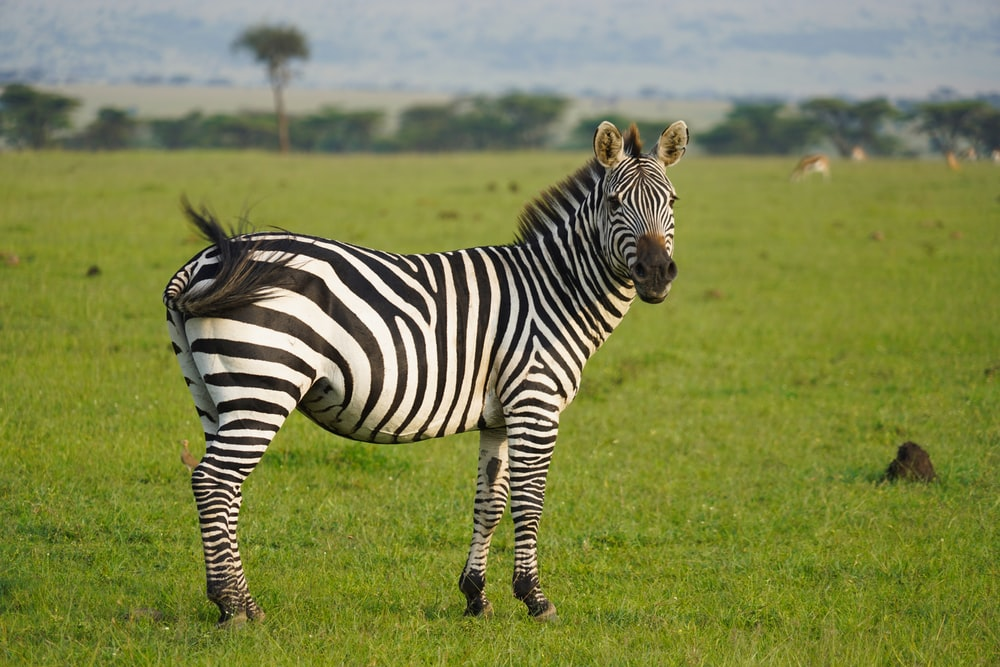

In [ ]:
from IPython.display import Image
Image(filename='zebra.jpg', width=300,height=200)

### Load Image
Load and convert the image to numpy array for preprocessing.

In [ ]:
def prepare_image(file):
    x, y = 224, 224 #height, width
    img = load_img(file, target_size=(x,y)) #returns PIL image
    img_array = img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims

In [ ]:
image = prepare_image(filename) #Prepare the image for the model

### Plot Image
Use the function plot_image to plot the given image.

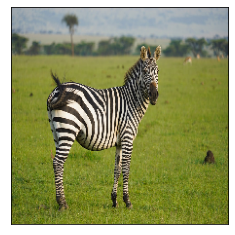

In [ ]:
def plot_image(image, label_true=None, class_names=None, label_pred=None):
    image = image[0]
    plt.imshow(image.astype(np.uint8))

    plt.xticks([])  # Remove ticks from the plot
    plt.yticks([])

plot_image(image)

### Load pretrained Model
Import MobileNet from Keras which returns Keras Image classification model which is pretrained using Imagenet. 

In [ ]:
pretrained_model = tf.keras.applications.mobilenet.MobileNet()

### Preprocess the image input
Use the function preprocess_input to preprocess the image so that it can be used as an input in MobileNet. Use the pretrained_model for prediction and test the given image in the model.

In [ ]:
preprocessed_image = preprocess_input(image.copy()) #preprocess using the preprocess_input library
predictions = pretrained_model.predict(preprocessed_image) #Get the predicted probabilities for each class
label = decode_predictions(predictions, top=13) #Convert the probabilities to class labels 
label

[[('n02391049', 'zebra', 0.99992335),
  ('n02129604', 'tiger', 1.0261668e-05),
  ('n02124075', 'Egyptian_cat', 9.72946e-06),
  ('n01798484', 'prairie_chicken', 5.2257647e-06),
  ('n02128925', 'jaguar', 4.8904603e-06),
  ('n02123159', 'tiger_cat', 4.1093376e-06),
  ('n02128385', 'leopard', 4.0116347e-06),
  ('n04192698', 'shield', 3.9562706e-06),
  ('n01685808', 'whiptail', 3.6493893e-06),
  ('n02454379', 'armadillo', 3.3016495e-06),
  ('n01518878', 'ostrich', 2.172655e-06),
  ('n02423022', 'gazelle', 2.1159071e-06),
  ('n02895154', 'breastplate', 1.2727196e-06)]]

### Distort pixel in an image
Use the function perturb_image to add noise to the pixel in the image to see how accurately the trained model predicts on the perturbed image. 

In [ ]:
def perturb_image(xs, img):
    x_pos, y_pos, *rgb = xs
    img[0][x_pos, y_pos] = rgb
    return img

## SECTION I 
### One Pixel Attack

### Create One Pixel Perturbed Image
Use the numpy array to perturb the images by one pixel and plot the image.

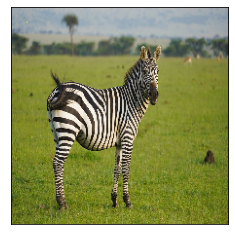

In [ ]:
pixel = np.array([16, 16, 255, 255, 0]) # pixel = x,y,r,g,b
image_perturbed = perturb_image(pixel, image)
plot_image(image_perturbed)

### Make predictions on perturbed image
Preprocess the perturbed image and make prediction using the pretrained MobileNet model on the perturbed image.

In [ ]:
preprocessed_perturbed = preprocess_input(image_perturbed.copy())
predictions = pretrained_model.predict(preprocessed_perturbed)
label = decode_predictions(predictions, top=13)
label

[[('n02391049', 'zebra', 0.99991846),
  ('n02124075', 'Egyptian_cat', 1.08819795e-05),
  ('n02129604', 'tiger', 1.0352511e-05),
  ('n01798484', 'prairie_chicken', 5.822699e-06),
  ('n02128925', 'jaguar', 4.9452196e-06),
  ('n02128385', 'leopard', 4.342225e-06),
  ('n02123159', 'tiger_cat', 4.3386735e-06),
  ('n04192698', 'shield', 4.1906146e-06),
  ('n01685808', 'whiptail', 3.899721e-06),
  ('n02454379', 'armadillo', 3.719919e-06),
  ('n02423022', 'gazelle', 2.3437642e-06),
  ('n01518878', 'ostrich', 2.3161228e-06),
  ('n03146219', 'cuirass', 1.3109828e-06)]]

## SECTION II
### Multi pixels Attack

### Create Quarter Pixel Perturbed Image
Use the for loop to perturb the images by quarter of the pixels and plot the image.

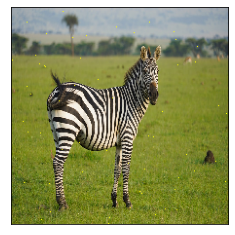

In [ ]:
import random 
image_perturbed = image.copy()

count = 0 
x = y = 224
ipos = set()
jpos = set()
i = random.randrange(0, x)
j = random.randrange(0, y)

while count < x//4:
  pixel = np.array([i, j, 255, 255, 0])
  image_perturbed = perturb_image(pixel, image_perturbed)
  ipos.add(i)
  jpos.add(j)
  while i in ipos:
    i = random.randrange(0, x)
  while j in jpos:
    j = random.randrange(0, y)
  count += 1

plot_image(image_perturbed)

### Make predictions on Quarter pixel perturbed image
Preprocess the perturbed image and make prediction using the pretrained MobileNet model on the perturbed image.

In [ ]:
preprocessed_perturbed = preprocess_input(image_perturbed.copy())
predictions = pretrained_model.predict(preprocessed_perturbed)
label = decode_predictions(predictions, top=13)
label

[[('n02391049', 'zebra', 0.9998946),
  ('n01798484', 'prairie_chicken', 1.3415709e-05),
  ('n02129604', 'tiger', 1.1687761e-05),
  ('n02124075', 'Egyptian_cat', 9.698785e-06),
  ('n02123159', 'tiger_cat', 9.021229e-06),
  ('n02454379', 'armadillo', 8.025514e-06),
  ('n01685808', 'whiptail', 6.4459023e-06),
  ('n01518878', 'ostrich', 3.9816605e-06),
  ('n02128925', 'jaguar', 3.7724717e-06),
  ('n04192698', 'shield', 3.7599007e-06),
  ('n02423022', 'gazelle', 3.1365814e-06),
  ('n02128385', 'leopard', 2.6284613e-06),
  ('n02113978', 'Mexican_hairless', 1.3688878e-06)]]

## SECTION III
### All Pixels Attack

### Create Fully Pixel Perturbed Image
Use the for loop to perturb the images by all the pixels and plot the image.

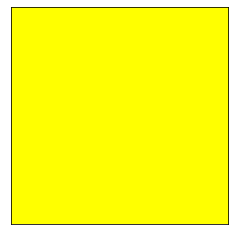

In [ ]:
image_perturbed = image.copy()
for i in range(0, 224):
  for j in range(0, 224):
    pixel = np.array([i, j, 255, 255, 0]) # pixel = x,y,r,g,b
    image_perturbed = perturb_image(pixel, image_perturbed)
plot_image(image_perturbed)

### Make predictions on all pixel perturbed image
Preprocess the perturbed image and make prediction using the pretrained MobileNet model on the perturbed image.

In [ ]:
preprocessed_perturbed = preprocess_input(image_perturbed.copy())
predictions = pretrained_model.predict(preprocessed_perturbed)
label = decode_predictions(predictions, top=13)
label

[[('n03207941', 'dishwasher', 0.18689789),
  ('n02840245', 'binder', 0.08528389),
  ('n03982430', 'pool_table', 0.0629296),
  ('n04372370', 'switch', 0.0524962),
  ('n04548280', 'wall_clock', 0.03680243),
  ('n03942813', 'ping-pong_ball', 0.029693875),
  ('n04525038', 'velvet', 0.028957857),
  ('n03832673', 'notebook', 0.016032247),
  ('n06359193', 'web_site', 0.015105818),
  ('n07749582', 'lemon', 0.013855495),
  ('n04265275', 'space_heater', 0.013126885),
  ('n04599235', 'wool', 0.011983677),
  ('n01910747', 'jellyfish', 0.009959592)]]

**Compare the classification results for different kind of pixel attacks demonstrated in the lab. [5 points]**
In the single pixel attack, the changes in the image was not detectable to human eye but for learning model, there was only a marginal change. The pretained mobilenet model predicted the image correctly as bison with similar confidence as before. However, other top predictions for attacked imaged have changed a bit. For example, 'OX' moved to second place replacing 'ram'. 

In multiple pixel attack where quarter pixels of bison image were maniputlated, the learned model still predicted the image correctly as bison, however the prediction confidence reduced from 0.99 to 0.98, but which is of course a marginal reduction. 

In last attack scenario where entire pixels of bison image were manipulated, the pretrained model could not able to detect the image correctly. In this case, model randomly guesses the prediction labels from the ImageNet dataset like dishwasher on top followed by binder and so on.

**Use Image(not from ImageNet) for the experiment and compare the results. [5 points]**
For this scenario, I used an url of random image of zebra from the internet. I got similar results as was observed in case of bison image. In all cases except all pixels attack, the model predicted correctly wih even higher confidence compared to bison. The reason might be the training  dataset (ImageNet) must have the images of Zebra. In case of other top predictions, I observed variations as shown below:

**Single Pixel Attack**

  [n02391049', 'zebra', 0.99991846),
  ('n02124075', 'Egyptian_cat', 1.08819795e-05),
  ('n02129604', 'tiger', 1.0352511e-05),
  ('n01798484', 'prairie_chicken', 5.822699e-06),
  ('n02128925', 'jaguar', 4.9452196e-06),
  ('n02128385', 'leopard', 4.342225e-06),]

**Quater Pixels Attack**
[('n02391049', 'zebra', 0.9998946),
  ('n01798484', 'prairie_chicken', 1.3415709e-05),
  ('n02129604', 'tiger', 1.1687761e-05),
  ('n02124075', 'Egyptian_cat', 9.698785e-06),
  ('n02123159', 'tiger_cat', 9.021229e-06),
  ('n02454379', 'armadillo', 8.025514e-06),]